1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  

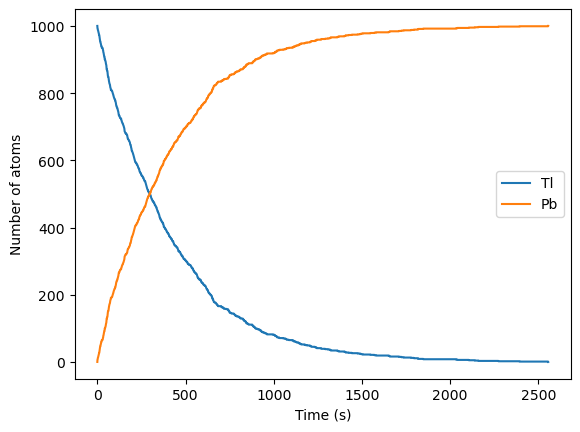

In [6]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
#a)

tau=3.052*60/np.log(2) # tau = half-life/ln(2)
N=1000
Tl=[N]
Pb=[0]
t=0
times=[0]
dt=1
while(Tl[-1]>0):
    t+=dt
    p= 1-2**(-dt/tau) # probability to decay at each interval dt
    n=npr.rand(Tl[-1]) # generate a random number for each Tl atom
    decays=np.sum(n<p) # if random numb < probab, the atom has decayed in that time interval
    Tl.append(Tl[-1]-decays)
    Pb.append(Pb[-1]+decays)
    times.append(t)

plt.plot(times,Tl,label='Tl')
plt.plot(times,Pb,label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")
plt.legend()
        


* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

The inverse CDF of p(t) is $x(z)=-\tau log_{2}(1-z)$, so:

Text(0, 0.5, 'Number of atoms of Tl')

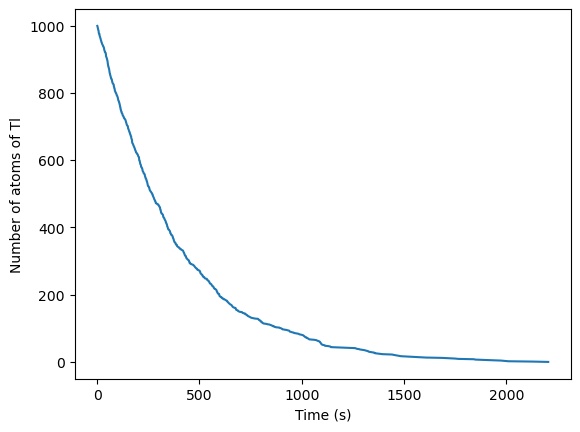

In [44]:
def inverse_cdf(z):
    return(-tau*np.log2(1-z))
    
u = npr.rand(N)
times = inverse_cdf(u) # times of decay of each atom of Tl

times=np.sort(times)
times= times[::-1]
Tl=np.arange(N)

plt.plot(times,Tl)
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms of Tl")

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [8]:
Z=79
N=10**6
x = npr.normal(0,1/100,N)
y = npr.normal(0,1/100,N)
b = (x**2 + y**2)**0.5


Particles with $\theta > \pi/2$ will have $\tan{\frac{1}{2}\theta} > 1 $, so this sets the following condition for b:
$b < \frac{Z e^2} {2\pi \epsilon_0 E } $. Using atomic units: $2\pi \epsilon_0 = 1/2,  e=1 $, we get $b < \frac{2Z} {E}$ with E in atomic units (Hartree).

In [10]:
counts =0
E= (7.7*10**6)/27.11 # (1 Hartree = 27.114eV)
for i in b:
    if( i < (2*Z/E) ):
        counts +=1
print("The fraction of particles scattered backwards is",counts/N*100,"%") 

The fraction of particles scattered backwards is 0.15059999999999998 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

I = 1.4458
I = 1.4542669230632639
Error = 0.0016619007532990015


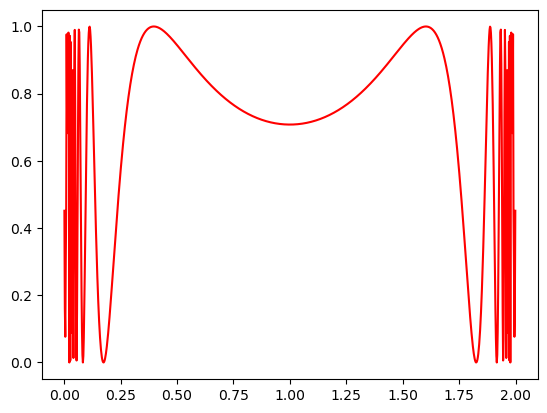

In [37]:

N=100000

def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')

# a) hit/miss method

count=0
for i in range(N):
    x=2*npr.rand() 
    y=npr.rand() # samples from a rectangle of sides 2 x 1
    if y<f(x): 
        count+=1
I=2*count/N # area*k/N
print("I =",I)

#b) mean value method

sum=0
for i in range(N):
    x=2*npr.rand() # points drawn in [0,2]
    sum+= f(x)
I=2*sum/N  # (b-a)*sum f(xi)/N
print("I =",I)
#b) error estimate  # sigma = (a-b)*rad(var(f)/N)
# let's estimate var(f)
x=np.linspace(0.001,1.999,1000)
f_x = f(x) 
sigma_f= f_x.std()
sigma = 2*sigma_f/(N)**0.5
print("Error =",sigma )

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



We'll use: $$
I=\frac{V}{N} \sum_{i=1}^{N} f(\vec{r}_i)
$$

In [81]:
import numpy.random as npr
import numpy as np
from math import pi

#a)
N=1000000
count=0
x= npr.uniform(-1,1,N)
y= npr.uniform(-1,1,N) # samples point (x,y) with unif distrib in square of side 2

for i in range(N):
    if ((x[i]**2+y[i]**2)<=1):
     count+=1
I=4*count/N # area square*counts/N
print(I)
print("True value is",pi)

#10-D sphere
count=0
for i in range(N):
    r= npr.uniform(-1,1,10)
    r_sq = r**2
    if( r_sq.sum()<=1):
       count+=1
I=2**10*count/N
print(I)
print("True value is approx 2.550")

3.13868
True value is 3.141592653589793
2.548736
True value is approx 2.550


 5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84. \
We have that $I=\int_0^1 \frac{1}{\sqrt x} dx = 2$. 
To generate random samples from the distribution w(x) we need to use the inverse CDF $w(z)=z^2$.


In [67]:

N=100000
def f(x):
    return( x**(-0.5)/(np.exp(x)+1) )
def w(x):
    return(1/x**0.5)
def inverse_cdf(x): #to generate random sample distributed as w(x)
    return(x**2)
integral_w = 2
sum=0

for i in range(N):
    x=npr.rand()
    sample=inverse_cdf(x) # generate random sample distributed as w(x)
    sum += f(sample)/w(sample)
I= integral_w*sum/N
print("I =",I) 

I = 0.8393199151599235
